# Alzheimer's (disease) prediction
////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [1]:
# import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
%%time
dataset=pd.read_csv("alzheimers_prediction_dataset.csv")

CPU times: total: 266 ms
Wall time: 283 ms


In [3]:
# duplicate value
dataset.duplicated().sum()

0

# Overview Alzheimer’s Disease

Alzheimer's disease is a progressive neurodegenerative disorder that primarily affects memory, thinking, and behavior. It happens due to the abnormal buildup of proteins in and around brain cells, leading to brain damage over time. The exact cause is not fully understood, but the disease is associated with several key processes:

#### High-Risk Factors for Alzheimer’s Disease
=> The following factors have been strongly linked to a higher risk of developing Alzheimer’s:

1. Family History & Genetics 🧬 (Non-modifiable)
Having a first-degree relative (parent or sibling) with Alzheimer's increases the risk.
The APOE-e4 gene is the strongest genetic risk factor.
2. Diabetes (Type 2) 🩸 (Modifiable)
High blood sugar damages blood vessels in the brain and promotes inflammation, increasing Alzheimer’s risk.
Insulin resistance can also lead to amyloid plaque buildup.
3. Hypertension (High Blood Pressure) 💓 (Modifiable)
High blood pressure can reduce blood flow to the brain, increasing the risk of brain damage and cognitive decline.
4. High Cholesterol Levels 🛢️ (Modifiable)
Elevated LDL ("bad") cholesterol is linked to amyloid plaque formation in the brain.
Low HDL ("good") cholesterol may also contribute to Alzheimer’s risk.
5. Sleep Problems (Chronic Poor Sleep) 💤 (Modifiable)
Poor sleep, especially insomnia and sleep apnea, prevents the brain from clearing beta-amyloid proteins.
Long-term sleep deprivation significantly increases dementia risk.
6. Depression 😞 (Modifiable)
Long-term depression is associated with brain inflammation and reduced brain volume in memory-related areas.
Chronic stress and anxiety may also increase dementia risk.
7. Air Pollution Exposure 🌫️ (Modifiable)
Long-term exposure to fine particulate matter (PM2.5) leads to brain inflammation and oxidative stress, accelerating cognitive decline.
Moderate to High-Risk Factors
Obesity (High BMI) ⚖️ – Midlife obesity increases inflammation and vascular damage.
Smoking 🚬 – Increases oxidative stress and damages brain cells.
Heavy Alcohol Consumption 🍷 – Excess alcohol accelerates brain shrinkage.
Low Physical Activity 🏃‍♂️ – Sedentary behavior increases Alzheimer’s risk.

In [4]:
dataset.head(1)

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No


# data_cleaning

In [5]:
def clean_data(df):
    return(
        df
        .drop(columns=['Education Level','Country','Marital Status','Income Level','Employment Status'])
        .rename(columns=str.lower)
    )


data=clean_data(dataset)

In [6]:
data.head(5)

,age,gender,bmi,physical activity level,smoking status,alcohol consumption,diabetes,hypertension,cholesterol level,family history of alzheimer’s,cognitive test score,depression level,sleep quality,dietary habits,air pollution exposure,genetic risk factor (apoe-ε4 allele),social engagement level,stress levels,urban vs rural living,alzheimer’s diagnosis
0,90,Male,33.0,Medium,Never,Occasionally,No,No,Normal,No,90,Low,Poor,Healthy,High,No,Low,High,Urban,No
1,72,Male,29.9,Medium,Former,Never,No,No,Normal,No,65,Low,Good,Healthy,Medium,No,High,High,Urban,No
2,86,Female,22.9,High,Current,Occasionally,No,Yes,Normal,No,43,High,Good,Average,Medium,No,Low,High,Rural,No
3,53,Male,31.2,Low,Never,Regularly,Yes,No,Normal,No,81,Medium,Average,Healthy,Medium,No,High,Low,Rural,No
4,58,Female,30.0,High,Former,Never,Yes,No,Normal,No,49,High,Poor,Unhealthy,High,No,Low,High,Rural,No


#  Exploratory Data Analysis (EDA)
//////////////////////////////////////////////////////////////////////////////////
#### High levels summary of data 

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   74283 non-null  int64  
 1   gender                                74283 non-null  object 
 2   bmi                                   74283 non-null  float64
 3   physical activity level               74283 non-null  object 
 4   smoking status                        74283 non-null  object 
 5   alcohol consumption                   74283 non-null  object 
 6   diabetes                              74283 non-null  object 
 7   hypertension                          74283 non-null  object 
 8   cholesterol level                     74283 non-null  object 
 9   family history of alzheimer’s         74283 non-null  object 
 10  cognitive test score                  74283 non-null  int64  
 11  depression leve

#### observation
- `total data(rows) `- `74283` & total `columns - 19`
- `float64(1)`, `int64(2)`, `object(17)`
- `object` => 'gender', 'physical activity level', 'smoking status',
       'alcohol consumption', 'diabetes', 'hypertension', 'cholesterol level',
       'family history of alzheimer’s', 'depression level', 'sleep quality',
       'dietary habits', 'air pollution exposure',
       'genetic risk factor (apoe-ε4 allele)', 'social engagement level',
       'stress levels', 'urban vs rural living', 'alzheimer’s diagnosis'
- `int` =>'age', 'cognitive test score'
- `float `=> bmi
- `null value are not present`
  

#### null value

In [8]:
data.isnull().sum()

age                                     0
gender                                  0
bmi                                     0
physical activity level                 0
smoking status                          0
alcohol consumption                     0
diabetes                                0
hypertension                            0
cholesterol level                       0
family history of alzheimer’s           0
cognitive test score                    0
depression level                        0
sleep quality                           0
dietary habits                          0
air pollution exposure                  0
genetic risk factor (apoe-ε4 allele)    0
social engagement level                 0
stress levels                           0
urban vs rural living                   0
alzheimer’s diagnosis                   0
dtype: int64

- nun vall are note present

#### numerical type of analysis

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,74283.0,71.964703,12.980748,50.0,61.0,72.0,83.0,94.0
bmi,74283.0,26.780639,4.764679,18.5,22.7,26.8,30.9,35.0
cognitive test score,74283.0,64.654241,20.153247,30.0,47.0,65.0,82.0,99.0


- age value are max value are 94 and min are 50 and mean value are 71
- bmi are max value 35 and min value are 18.5
- cognitive test score are 99 max and min are 30 


#### category type of analysis

In [10]:
data.describe(include="O")

,gender,physical activity level,smoking status,alcohol consumption,diabetes,hypertension,cholesterol level,family history of alzheimer’s,depression level,sleep quality,dietary habits,air pollution exposure,genetic risk factor (apoe-ε4 allele),social engagement level,stress levels,urban vs rural living,alzheimer’s diagnosis
count,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283
unique,2,3,3,3,2,2,2,2,3,3,3,3,2,3,3,2,2
top,Female,High,Current,Never,No,No,Normal,No,Medium,Good,Average,High,No,Medium,Medium,Rural,No
freq,37249,24853,24915,24865,59527,52134,51973,52004,24843,25145,24917,24906,59561,24859,24886,37203,43570


- Gender: More females (37,249) than males.
- Physical Activity Level: Most have high activity (24,853).
- Smoking Status: "Current" smokers are most common (24,915).
- Alcohol Consumption: Majority never consume alcohol (24,865).
- Diabetes: Most do not have diabetes (59,527).
- Hypertension: Majority do not have hypertension (52,134).
- Cholesterol Level: Most have normal cholesterol (51,973).
- Family History of Alzheimer’s: Majority have no family history (52,004).
- Depression Level: "Medium" depression is most frequent (24,843).
- Sleep Quality: "Good" sleep quality is most common (25,145).
- Dietary Habits: "Average" dietary habits are most common (24,917).
- Air Pollution Exposure: High exposure is the most frequent (24,906).
- Genetic Risk Factor (Apoe-e4 allele): Most do not carry the risk allele (59,561).
- Social Engagement Level: "Medium" social engagement is most common (24,859).
- Stress Levels: "Medium" stress is most frequent (24,886).
- Urban vs. Rural Living: More people live in rural areas (37,203).
- Alzheimer’s Diagnosis: Most do not have Alzheimer’s (43,570), but 30,713 cases exist.

####  Imbalance  Detection of target column

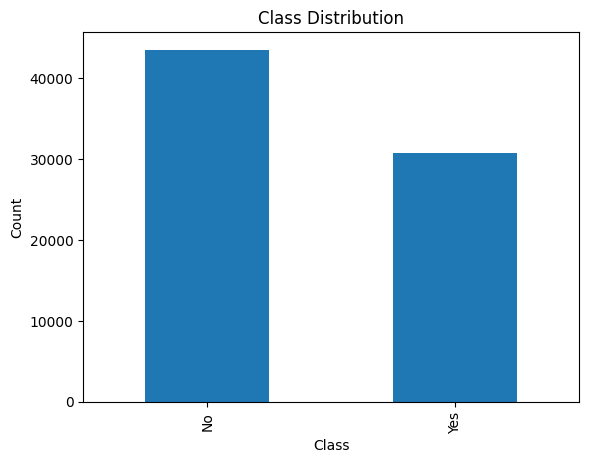

alzheimer’s diagnosis
No     43570
Yes    30713
Name: count, dtype: int64

In [11]:
data['alzheimer’s diagnosis'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


data['alzheimer’s diagnosis'].value_counts()

#### countplot of categorical_features

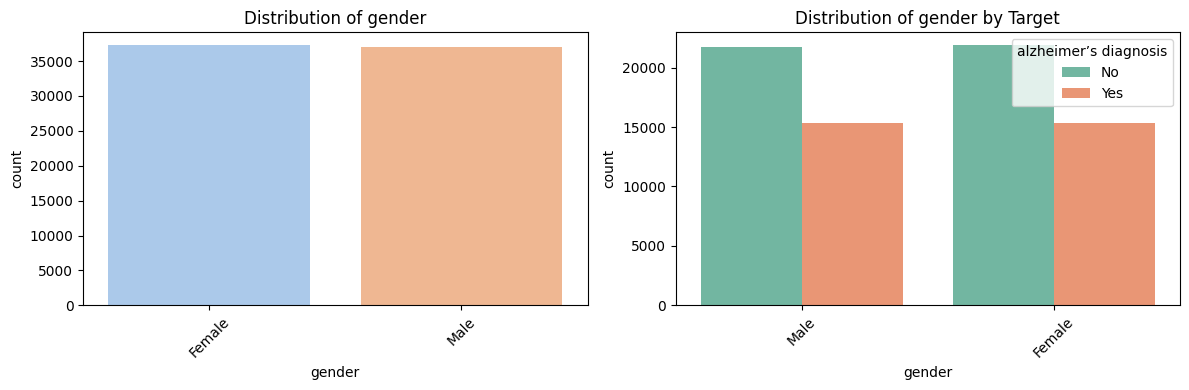

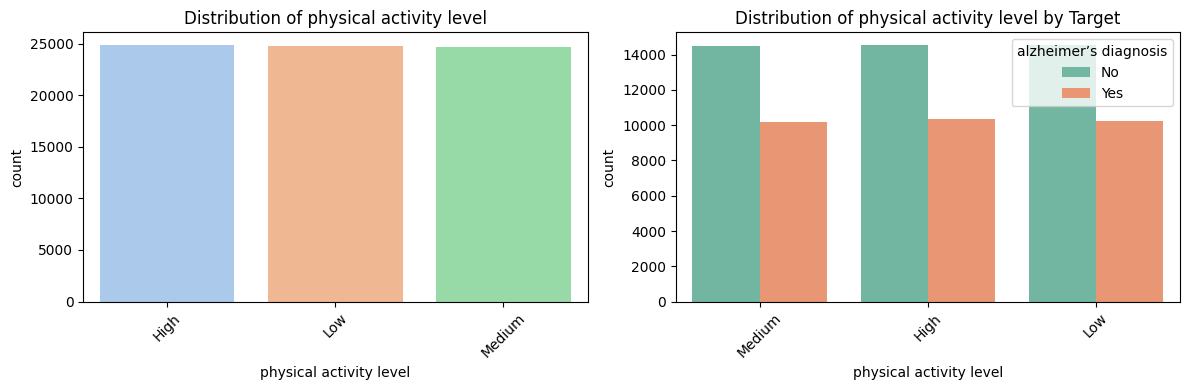

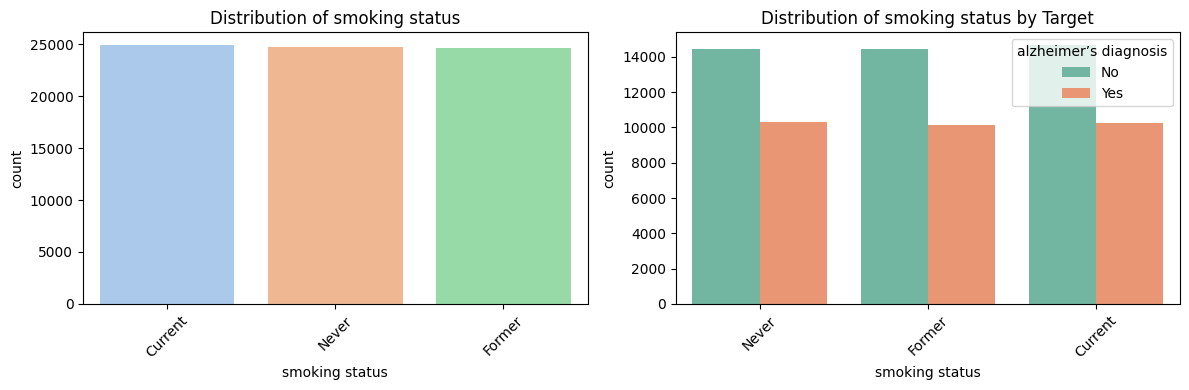

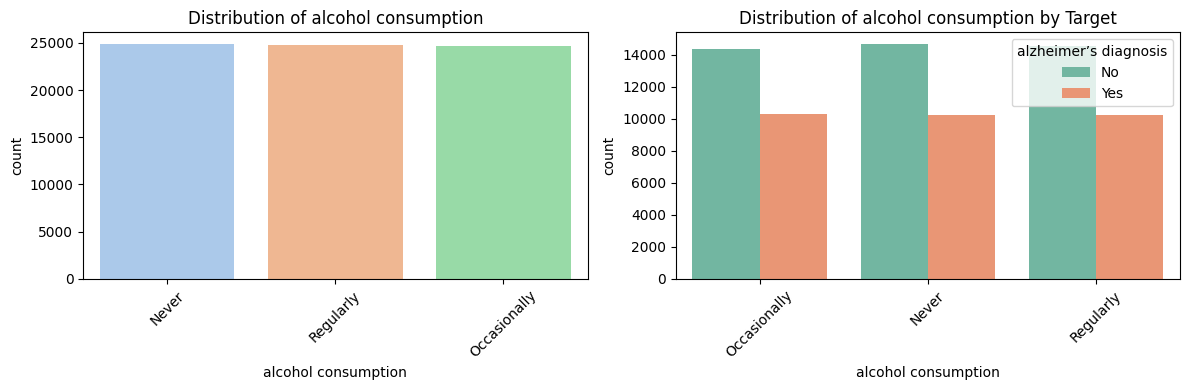

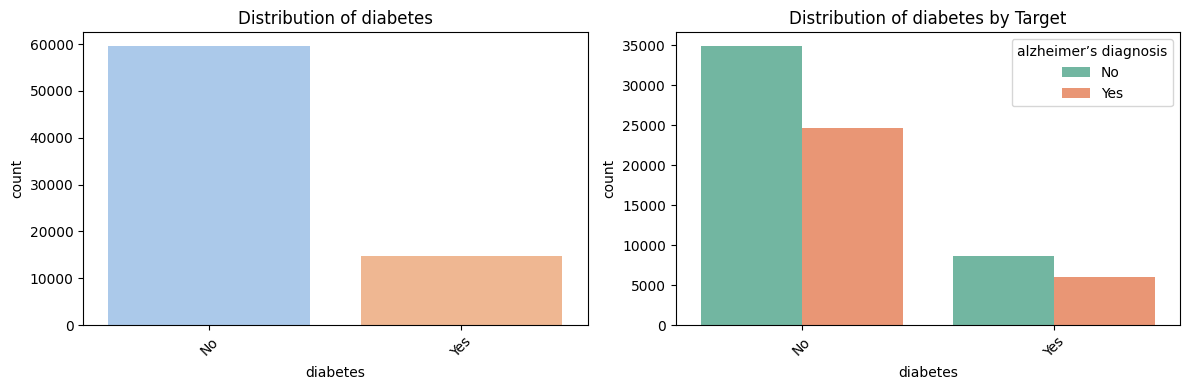

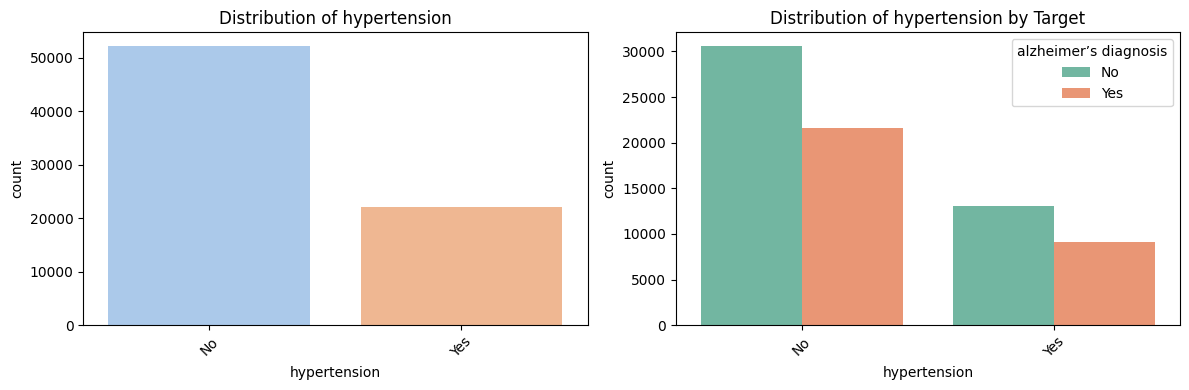

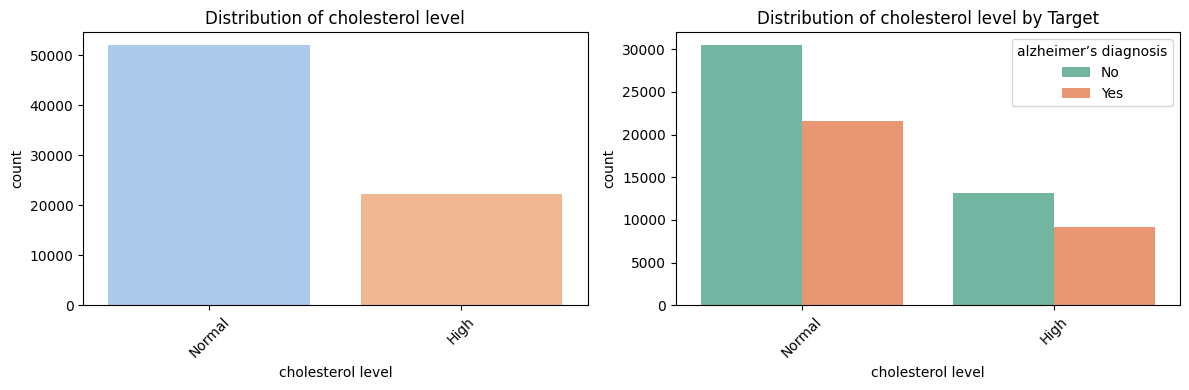

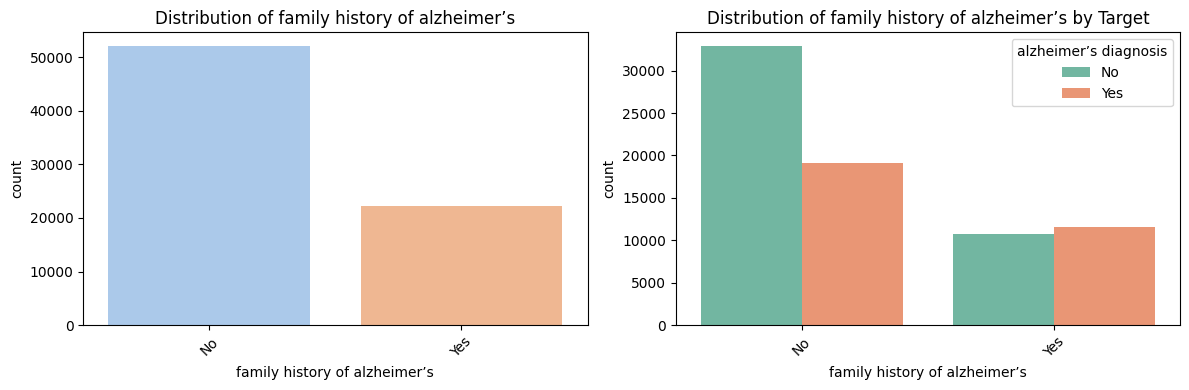

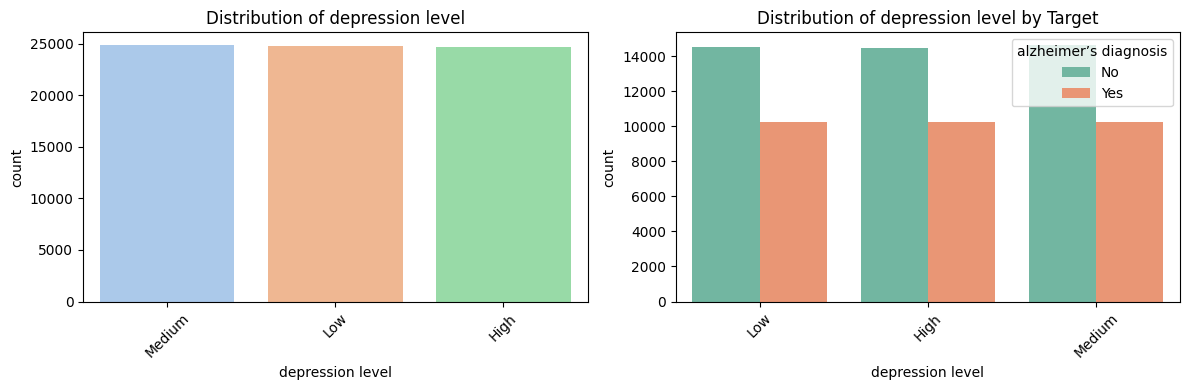

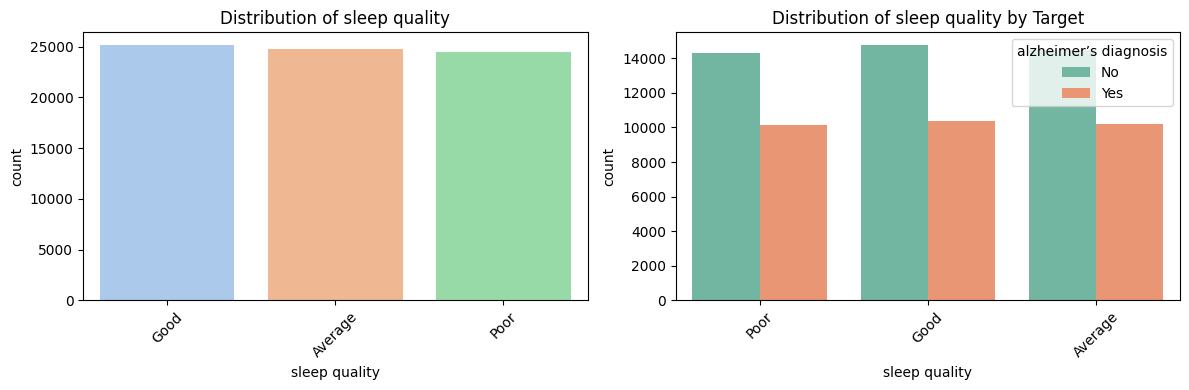

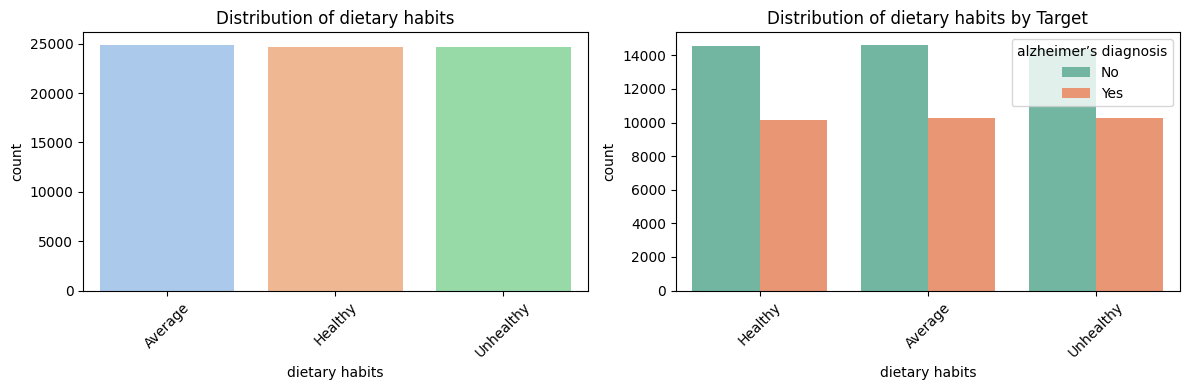

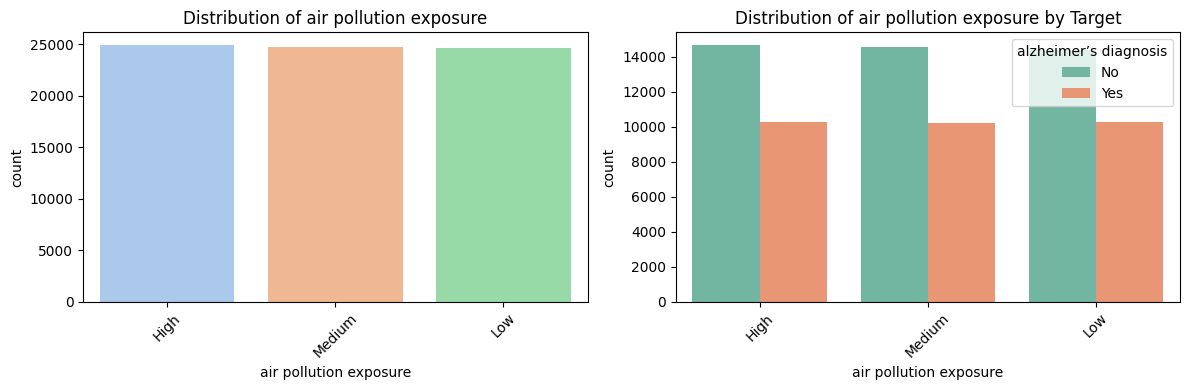

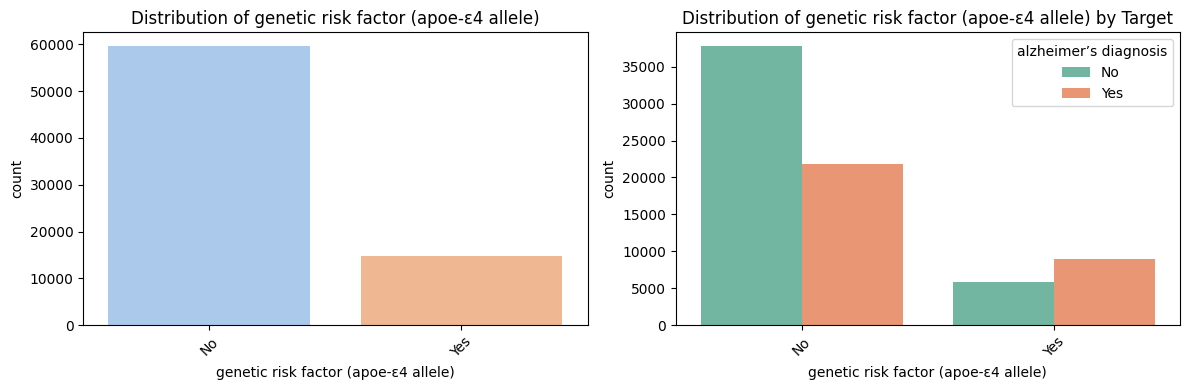

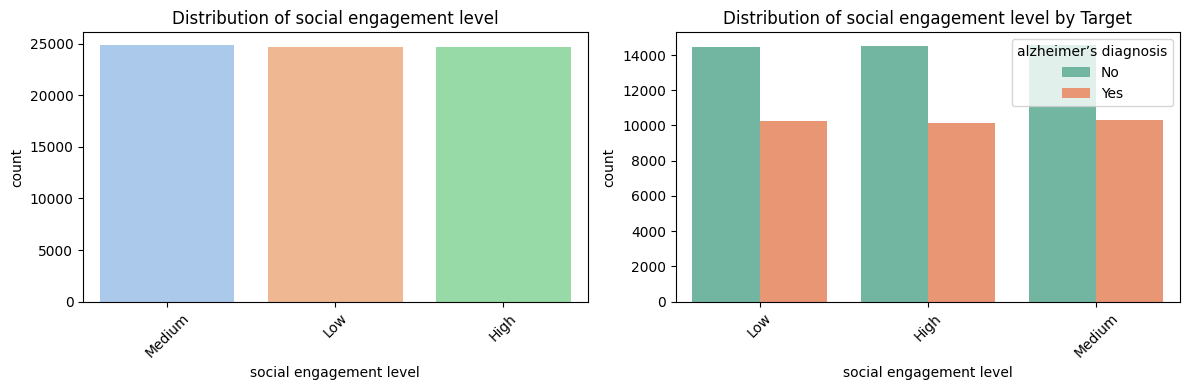

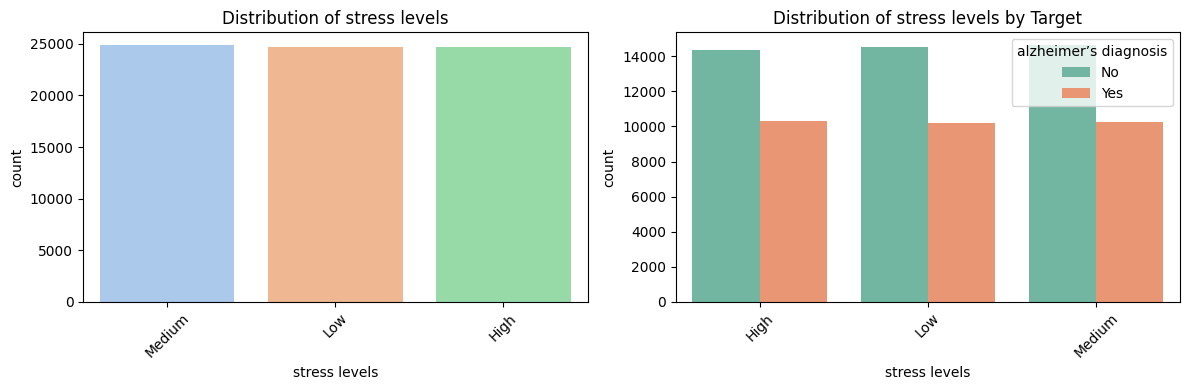

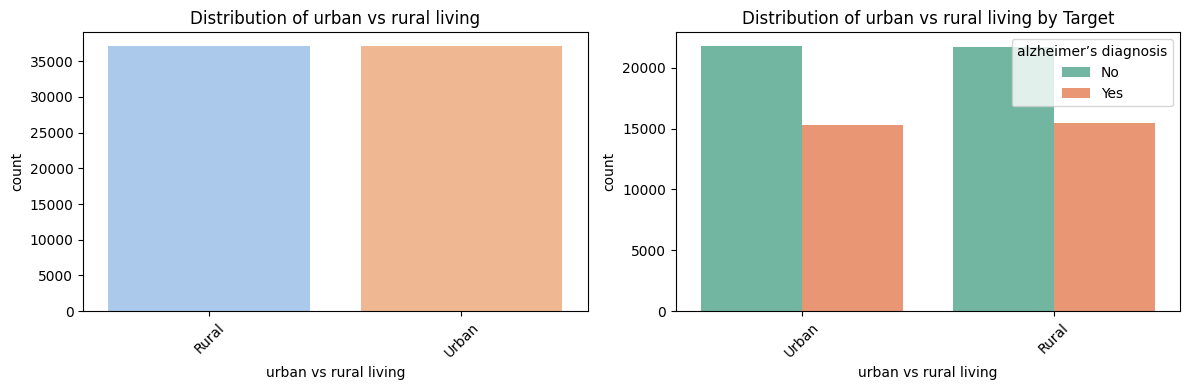

In [12]:


categorical_features = [
    'gender', 'physical activity level', 'smoking status',
    'alcohol consumption', 'diabetes', 'hypertension', 'cholesterol level',
    'family history of alzheimer’s', 'depression level', 'sleep quality',
    'dietary habits', 'air pollution exposure',
    'genetic risk factor (apoe-ε4 allele)', 'social engagement level',
    'stress levels', 'urban vs rural living'
]

for col in categorical_features:
    plt.figure(figsize=(12, 4))
    
    # First plot: Overall distribution
    plt.subplot(1, 2, 1)
    sns.countplot(x=data[col], data=data, order=data[col].value_counts().index, palette="pastel")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    
    # Second plot: Distribution by Alzheimer's diagnosis
    plt.subplot(1, 2, 2)
    sns.countplot(x=col, data=data, hue='alzheimer’s diagnosis', palette="Set2")
    plt.title(f"Distribution of {col} by Target")
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


#### Crosstab with Chi-Square Test

In [13]:

from scipy.stats import chi2_contingency

categorical_features = [
    'gender', 'physical activity level', 'smoking status',
    'alcohol consumption', 'diabetes', 'hypertension', 'cholesterol level',
    'family history of alzheimer’s', 'depression level', 'sleep quality',
    'dietary habits', 'air pollution exposure',
    'genetic risk factor (apoe-ε4 allele)', 'social engagement level',
    'stress levels', 'urban vs rural living'
]

# Loop through each categorical column and compute the Chi-Square test
for col in categorical_features:
    if data[col].isnull().sum() > 0 or data['alzheimer’s diagnosis'].isnull().sum() > 0:
        print(f"Skipping {col} due to missing values.")
        continue  # Skip features with NaN values
    
    contingency_table = pd.crosstab(data[col], data['alzheimer’s diagnosis'])

    # Ensure there are no categories with extremely low counts
    if (contingency_table.values < 5).sum() > 0:
        print(f"Warning: {col} has low expected frequencies. Results may be unreliable.")

    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    print(f"Feature: {col}, p-value:{p:.4f}")


Feature: gender, p-value:0.7156
Feature: physical activity level, p-value:0.7007
Feature: smoking status, p-value:0.5682
Feature: alcohol consumption, p-value:0.2818
Feature: diabetes, p-value:0.4721
Feature: hypertension, p-value:0.7544
Feature: cholesterol level, p-value:0.5719
Feature: family history of alzheimer’s, p-value:0.0000
Feature: depression level, p-value:0.7476
Feature: sleep quality, p-value:0.9543
Feature: dietary habits, p-value:0.4662
Feature: air pollution exposure, p-value:0.4601
Feature: genetic risk factor (apoe-ε4 allele), p-value:0.0000
Feature: social engagement level, p-value:0.6845
Feature: stress levels, p-value:0.3603
Feature: urban vs rural living, p-value:0.2665


>Key Takeaways

- Low p-value (p < 0.05) → The feature is statistically significant (it has a meaningful relationship with the target).
- High p-value (p ≥ 0.05) → The feature is not statistically significant (it does not have a strong relationship with the target).
- Strongly Significant Features (Keep for modeling):
-  Family history of Alzheimer’s
-  Genetic risk factor (APOE-ε4 allele)
- Weakly Significant Features (Consider Removing or Feature Engineering):
-  Sleep quality, hypertension, cholesterol, stress levels, etc.

In [14]:
data.select_dtypes(include='int').columns

Index(['age', 'cognitive test score'], dtype='object')

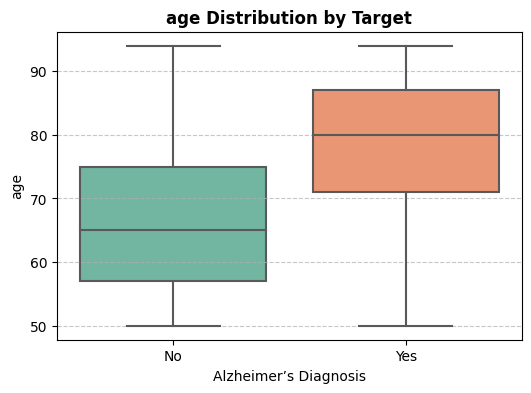

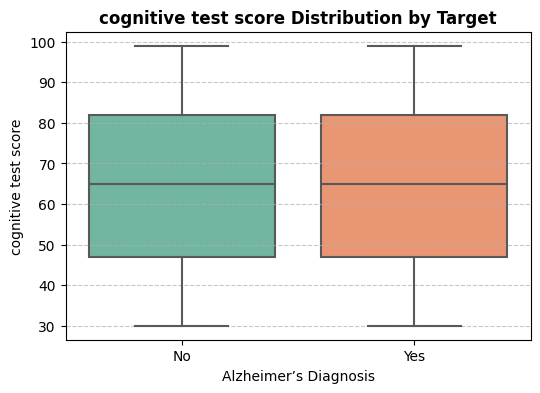

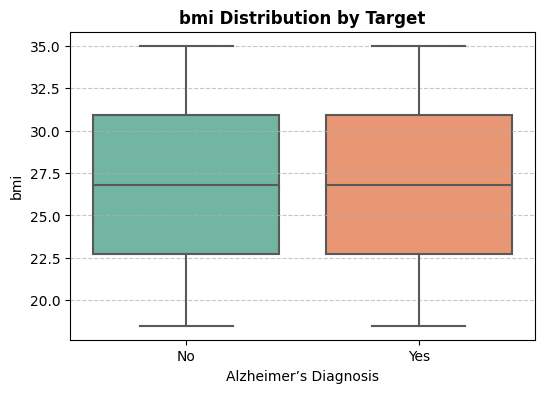

In [15]:

numerical_features = ['age', 'cognitive test score', 'bmi']  # Example

for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data['alzheimer’s diagnosis'], y=data[col], palette="Set2")  # Choose a color palette
    plt.title(f"{col} Distribution by Target", fontsize=12, fontweight='bold')
    plt.xlabel("Alzheimer’s Diagnosis", fontsize=10)
    plt.ylabel(col, fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


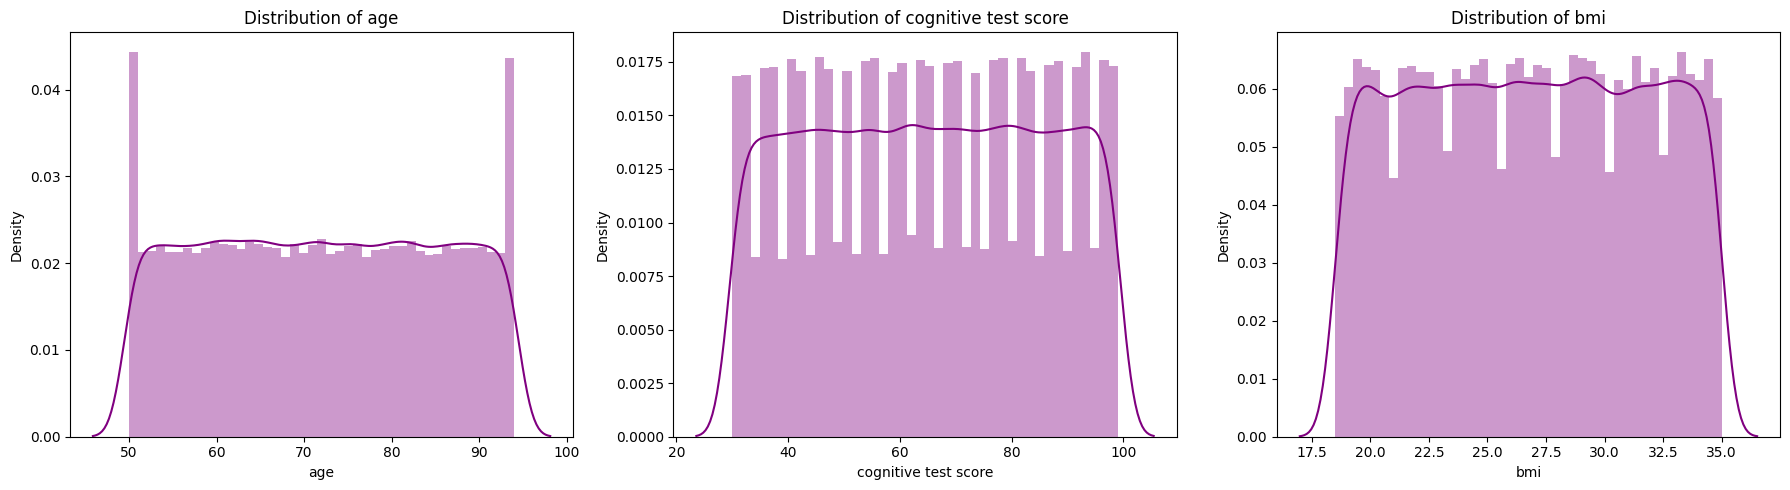

In [16]:

features = ['age', 'cognitive test score', 'bmi']
plt.figure(figsize=(18, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.distplot(data[feature], kde=True, color='purple')
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()


- These distributions may be approximately uniform, but they are not truly uniform.
- The presence of peaks and dips suggests some underlying patterns in the data.

# spreate input & output data 

In [17]:
input_data=data.drop(columns="alzheimer’s diagnosis")
output_data=data["alzheimer’s diagnosis"]

# train_test_split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Split into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(input_data,output_data, test_size=0.3, random_state=42)

# Further split the training set into training and validation sets (80% train, 20% val)
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)


print("x_train",x_train.shape)
print('x_test',x_test.shape)
#print('x_val',x_val.shape)


x_train (51998, 19)
x_test (22285, 19)


# import libraries

In [20]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import VotingClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from mlxtend.feature_selection import SequentialFeatureSelector

# ColumnTransformer

In [21]:


transformer = ColumnTransformer(
    transformers=[
        ('tnf1', OrdinalEncoder(categories=[['Low', 'Medium', 'High']] * 5), ['physical activity level',
                                                                          'depression level', 'social engagement level', 
                                                                       'air pollution exposure', 'stress levels']),

        ('tnf2', OrdinalEncoder(categories=[['No', 'Yes']] * 4), ['diabetes', 'hypertension', 
                                                              'genetic risk factor (apoe-ε4 allele)', 
                                                                'family history of alzheimer’s']),

        ('tnf3', OrdinalEncoder(categories=[['Never', 'Former', 'Current']]),  ['smoking status']),

        ('tnf4', OrdinalEncoder(categories=[['Never', 'Occasionally', 'Regularly']]), ['alcohol consumption']),

        ('tnf5', OrdinalEncoder(categories=[['Poor', 'Average', 'Good']]), ['sleep quality']),

        ('tnf6', OrdinalEncoder(categories=[['Unhealthy', 'Average', 'Healthy']]),  ['dietary habits']),
        
        ('tnf7', OrdinalEncoder(categories=[['Normal', 'High']]),  ['cholesterol level']),

        ('tnf8', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), ['urban vs rural living','gender'])
        
    ],
    remainder='passthrough'
)



# Fit and transform the data
x_train_transformed = transformer.fit_transform(x_train)
x_test_transformed = transformer.transform(x_test)


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Train encoding
y_test_encoded = label_encoder.transform(y_test)  # Test encoding


# Generate column names
# OrdinalEncoder columns
ordinal_cols = (['physical activity level', 'depression level', 'social engagement level', 'air pollution exposure', 
                 'stress levels'] +
                ['diabetes', 'hypertension', 'genetic risk factor (apoe-ε4 allele)', 'family history of alzheimer’s'] +
                ['smoking status', 'alcohol consumption', 'sleep quality', 'dietary habits','cholesterol level'])

# OneHotEncoder columns
one_hot_encoder_cols = transformer.named_transformers_['tnf8'].get_feature_names_out(['urban vs rural living',
                                                                                      'gender']).tolist()

# Passthrough (remainder) columns
remainder_cols = [col for col in x_train.columns if col not in ordinal_cols + ['urban vs rural living','gender']]

# Combine all column names
final_columns = ordinal_cols + one_hot_encoder_cols + remainder_cols

# Convert transformed data into DataFrames
x_train_transformed = pd.DataFrame(x_train_transformed, columns=final_columns, index=x_train.index)
x_test_transformed = pd.DataFrame(x_test_transformed, columns=final_columns, index=x_test.index)



# Model bulding

In [22]:
def Kfold(model, model_name):
    model_scores = cross_val_score(model, x_train_transformed, y_train_encoded, cv=10)
    model_score = np.average(model_scores)
    print(f"{model_name} score on cross validation: {model_score * 100:.2f}%")

def train(model, model_name, threshold=0.5):
    model.fit(x_train_transformed, y_train_encoded)
    
    if hasattr(model, "predict_proba"):  # Check if model supports probability predictions
        y_train_prob = model.predict_proba(x_train_transformed)[:, 1]
        y_train_pred = (y_train_prob >= threshold).astype(int)
        
        y_test_prob = model.predict_proba(x_test_transformed)[:, 1]
        y_test_pred = (y_test_prob >= threshold).astype(int)
    else:
        y_train_pred = model.predict(x_train_transformed)
        y_test_pred = model.predict(x_test_transformed)

    model_train_score = accuracy_score(y_train_encoded, y_train_pred)
    model_test_score = accuracy_score(y_test_encoded, y_test_pred)

    print(f"{model_name} model score on Training data: {model_train_score * 100:.2f}%")
    print(f"{model_name} model score on Testing data: {model_test_score * 100:.2f}%")

def class_report_and_confusion_matrix(model, threshold=0.5):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(x_test_transformed)[:, 1]
        y_pred = (y_prob >= threshold).astype(int)
    else:
        y_pred = model.predict(x_test_transformed)

    print(classification_report(y_test_encoded, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_pred, xticks_rotation=45)


#### LogisticRegression

Logistic Regression score on cross validation: 70.97%
Logistic Regression model score on Training data: 61.42%
Logistic Regression model score on Testing data: 61.45%
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.38      0.54     13065
           1       0.52      0.94      0.67      9220

    accuracy                           0.61     22285
   macro avg       0.71      0.66      0.60     22285
weighted avg       0.74      0.61      0.59     22285



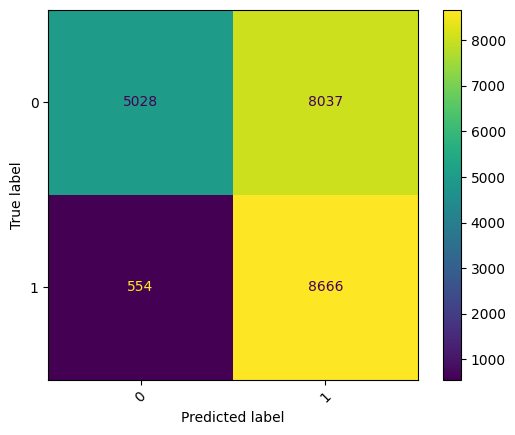

In [23]:
lr = LogisticRegression()

# Perform K-Fold Cross Validation
Kfold(lr, "Logistic Regression")

# Train the model and evaluate using a threshold
train(lr, "Logistic Regression", threshold=0.2)  

print('-' * 70)

# Generate classification report and confusion matrix with the same threshold
class_report_and_confusion_matrix(lr, threshold=0.2)


#### MultinomialNB

naive bayes score on cross validation: 63.31%
naive bayes model score on Training data: 52.84%
naive bayes model score on Testing data: 52.50%
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.25      0.38     13065
           1       0.46      0.92      0.62      9220

    accuracy                           0.52     22285
   macro avg       0.64      0.58      0.50     22285
weighted avg       0.67      0.52      0.48     22285



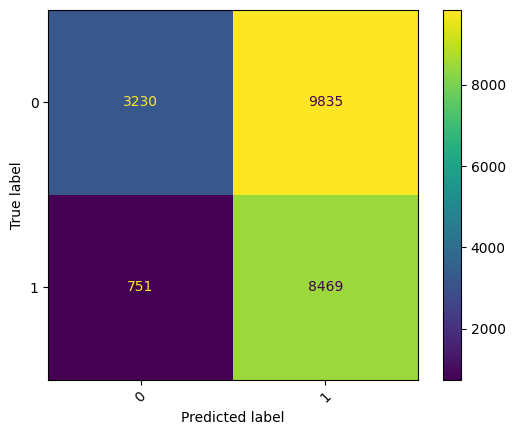

In [24]:
nb = MultinomialNB()

# Perform K-Fold Cross Validation
Kfold(nb, "naive bayes")

# Train the model and evaluate using a threshold
train(nb, "naive bayes", threshold=0.1)  

print('-' * 70)

# Generate classification report and confusion matrix with the same threshold
class_report_and_confusion_matrix(nb, threshold=0.1)


#### KNeighborsClassifier

KNeighbors score on cross validation: 67.19%
KNeighbors  model score on Training data: 60.72%
KNeighbors  model score on Testing data: 53.58%
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.27      0.40     13065
           1       0.47      0.92      0.62      9220

    accuracy                           0.54     22285
   macro avg       0.64      0.59      0.51     22285
weighted avg       0.68      0.54      0.49     22285



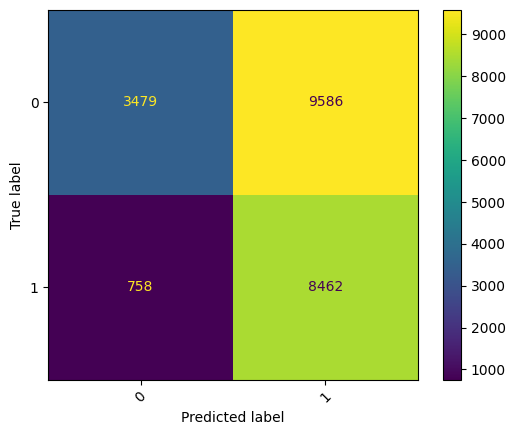

In [25]:
knn = KNeighborsClassifier()

# Perform K-Fold Cross Validation
Kfold(knn, "KNeighbors")

# Train the model and evaluate using a threshold
train(knn, "KNeighbors ", threshold=0.2)  

print('-' * 70)

# Generate classification report and confusion matrix with the same threshold
class_report_and_confusion_matrix(knn, threshold=0.2)


In [26]:
#svc = SVC()

# Perform K-Fold Cross Validation
#Kfold(svc, "SVC")

# Train the model and evaluate using a threshold
#train(svc, "SVC", threshold=0.3)  

#print('-' * 70)

# Generate classification report and confusion matrix with the same threshold
#class_report_and_confusion_matrix(svc, threshold=0.3)


#### DecisionTreeClassifier

Decision Tree score on cross validation: 67.32%
Decision Tree model score on Training data: 62.32%
Decision Tree model score on Testing data: 56.31%
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.31      0.45     13065
           1       0.49      0.92      0.64      9220

    accuracy                           0.56     22285
   macro avg       0.67      0.62      0.54     22285
weighted avg       0.70      0.56      0.53     22285



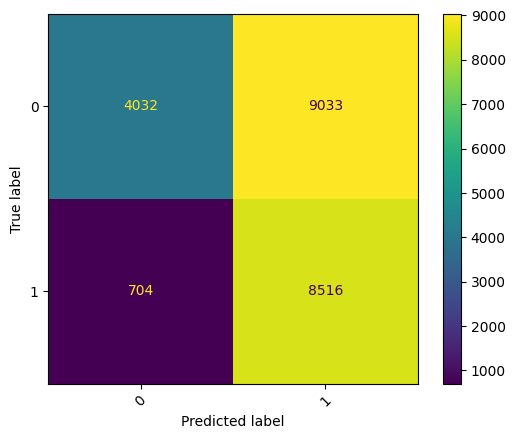

In [27]:
dc = DecisionTreeClassifier(min_samples_leaf=10)

# Perform K-Fold Cross Validation
Kfold(dc, "Decision Tree")

# Train the model and evaluate using a threshold
train(dc, "Decision Tree", threshold=0.05)  

print('-' * 70)

# Generate classification report and confusion matrix with the same threshold
class_report_and_confusion_matrix(dc, threshold=0.05)


#### AdaBoostClassifier

AdaBoost score on cross validation: 72.45%
AdaBoost model score on Training data: 58.66%
AdaBoost model score on Testing data: 58.70%
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.32      0.47     13065
           1       0.50      0.97      0.66      9220

    accuracy                           0.59     22285
   macro avg       0.72      0.64      0.57     22285
weighted avg       0.75      0.59      0.55     22285



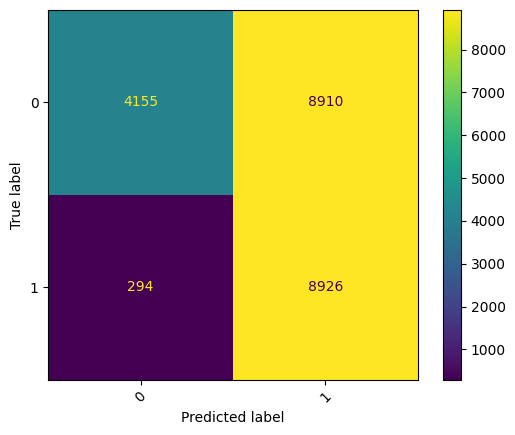

In [28]:
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=150,
    learning_rate=0.01
    )

# Perform K-Fold Cross Validation
Kfold(ada, "AdaBoost")

# Train the model and evaluate using a threshold
train(ada, "AdaBoost", threshold=0.3)  

print('-' * 70)

# Generate classification report and confusion matrix with the same threshold
class_report_and_confusion_matrix(ada, threshold=0.3)


### XGBClassifier

XGBClassifier score on cross validation: 71.18%
XGBClassifier model score on Training data: 79.09%
XGBClassifier model score on Testing data: 66.58%
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.52      0.65     13065
           1       0.56      0.87      0.68      9220

    accuracy                           0.67     22285
   macro avg       0.71      0.70      0.66     22285
weighted avg       0.73      0.67      0.66     22285



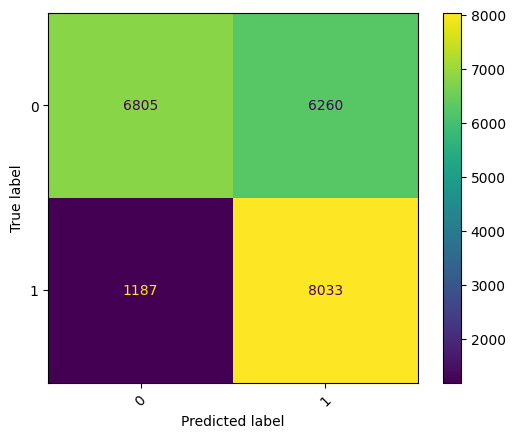

In [29]:
xbg = XGBClassifier(
        n_estimators=200,
        max_depth=15,
        learning_rate=0.01,
        gamma=0,
        min_child_weight=2,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.01,
        reg_lambda=1,
        objective='binary:logistic',
        eval_metric='logloss'

)

# Perform K-Fold Cross Validation
Kfold(xbg, "XGBClassifier")

# Train the model and evaluate using a threshold
train(xbg, "XGBClassifier", threshold=0.3)  

print('-' * 70)

# Generate classification report and confusion matrix with the same threshold
class_report_and_confusion_matrix(xbg, threshold=0.3)


# ROC_curve

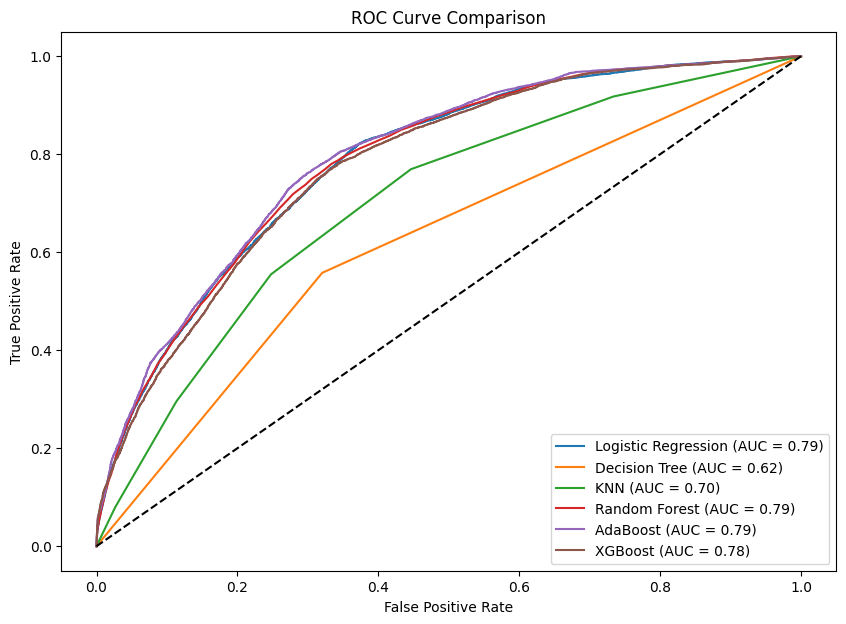

In [32]:


# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    #"SVM": SVC(probability=True),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier()
}

# Train models and evaluate performance
plt.figure(figsize=(10, 7))

for name, model in models.items():
    model.fit(x_train_transformed, y_train_encoded)
    y_pred = model.predict(x_test_transformed)
    y_pred_proba = model.predict_proba(x_test_transformed)[:, 1]  # Probability for positive class

    # Metrics
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='weighted')
    recall = recall_score(y_test_encoded, y_pred, average='weighted')
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')
    auc_score = roc_auc_score(y_test_encoded, y_pred_proba)
    
    # Confusion Matrix
    #print(f"{name}:\n Accuracy: {accuracy}\n Precision: {precision}\n Recall: {recall}\n F1 Score: {f1}\n AUC-ROC: {auc_score}\n")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()
